In [ ]:
using DrWatson
@quickactivate "APLG"
include(srcdir("plotting.jl"));
include(srcdir("travelling.jl"));
include(srcdir("phase_diag.jl"));
using PyPlot, LaTeXStrings


In [2]:
function generate_figure_4cases(params_full, params_outer)
    fig, axs = subplots(2,4,figsize=(20,10));
    rc("text", usetex=true)
    font = 18

    # First column:
    @unpack Lx,Nx,ϕa,ϕp,v0 = params_outer[1]
    f, u, cout = load_outer0(Lx,Nx,ϕa,ϕp,v0)
    i = argmax(f[:,2]-f[:,1])
    show_f_reduced([axs[1],axs[2]],fig,font,param,f; c=cout, point = i, Δϕ = 0.001,typesol = 0) 
    axs[2].legend(loc="lower right", fontsize=font, edgecolor="white")

    @unpack Lx,Nx,ϕa,ϕp,v0 = params_full[1]
    f, u, c = load_full(Lx,Nx,ϕa,ϕp,v0)
    axs[2].plot(f[:,1]+f[:,2],f[:,3]; color = "black", linestyle = "--")

    # Second column:
    @unpack Lx,Nx,ϕa,ϕp,v0,ϕ,γ = params_outer[2]
    f, u, cout = load_outer1(Lx,Nx,ϕa,ϕp,v0,ϕ,γ)
    i = argmax(f[:,2]-f[:,1])
    show_f_reduced([axs[3],axs[4]],fig,font,param,f; c=cout, point = i, Δϕ = 0.001,typesol = 1) 
    axs[3].get_legend().remove()


    @unpack Lx,Nx,ϕa,ϕp,v0 = params_full[2]
    f, u, c = load_full(Lx,Nx,ϕa,ϕp,v0)
    axs[4].plot(f[:,1]+f[:,2],f[:,3]; color = "black", linestyle = "--")
    axs[4].get_legend().remove()


    # Third column:
    @unpack Lx,Nx,ϕa,ϕp,v0,ind,γ = params_outer[3]
    f, u, cout = load_outer2(Lx,Nx,ϕa,ϕp,v0,ind,γ)
    show_f_reduced([axs[5],axs[6]],fig,font,param,f; c=cout, point = ind-Nx÷2, typesol = 2) 
    axs[5].get_legend().remove()


    @unpack Lx,Nx,ϕa,ϕp,v0 = params_full[3]
    f, u, c = load_full(Lx,Nx,ϕa,ϕp,v0)
    axs[6].plot(f[:,1]+f[:,2],f[:,3]; color = "black", linestyle = "--")
    axs[6].get_legend().remove()

    # Fourth column:
    @unpack Lx,Nx,ϕa,ϕp,v0,ind,γ = params_outer[4]
    f, u, cout = load_outer2(Lx,Nx,ϕa,ϕp,v0,ind,γ)
    show_f_reduced([axs[7],axs[8]],fig,font,param,f; c=cout, point = ind-Nx÷2, typesol = 3) 
    axs[7].get_legend().remove()


    @unpack Lx,Nx,ϕa,ϕp,v0 = params_full[4]
    f, u, c = load_full(Lx,Nx,ϕa,ϕp,v0)
    axs[8].plot(f[:,1]+f[:,2],f[:,3]; color = "black", linestyle = "--")
    axs[8].get_legend().remove()
    fig.tight_layout()
    return fig;
end

generate_figure_4cases (generic function with 1 method)

# Figure 5

In [3]:
# Create parameters
params_full = []
params_outer = []
ϕas = [0.45, 0.45, 0.5573596821749547, 0.5405]
ϕps = [0.35, 0.3, 0.19547551291881637, 0.195]
Lx, Nx, v0 = 25.0, 1600, 7.5
Nx_outer = 1024

# Generate parameters for each configuration
map(ϕas, ϕps) do ϕa, ϕp
    param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
    push!(params_full, param)
end
param, ps = get_param_outer0(Lx,Nx_outer,ϕas[1],ϕps[1],v0);
push!(params_outer,param)
param, ps = get_param_outer1(Lx,Nx_outer,ϕas[2],ϕps[2],v0, 0.75, 1.65);
push!(params_outer,param)
param, ps = get_param_outer2(Lx,Nx_outer,ϕas[3],ϕps[3],v0, 652, 1.54);
push!(params_outer,param)
param, ps = get_param_outer2(Lx,Nx_outer,ϕas[4],ϕps[4],v0, 704, 1.58);
push!(params_outer,param)


4-element Vector{Any}:
 Dict{String, Any}("T" => 2000.0, "save_interval" => 100.0, "δ" => 0.01, "δt" => 1.0e-5, "name" => "outer_sol_0", "save_on" => true, "DT" => 1.0, "Lx" => 25.0, "N" => 100, "DR" => 1.0…)
 Dict{String, Any}("T" => 2000.0, "save_interval" => 100.0, "δ" => 0.01, "δt" => 1.0e-5, "name" => "outer_sol_1", "save_on" => true, "DT" => 1.0, "Lx" => 25.0, "N" => 100, "DR" => 1.0…)
 Dict{String, Any}("T" => 2000.0, "save_interval" => 100.0, "δ" => 0.01, "δt" => 1.0e-5, "name" => "outer_sol_2", "save_on" => true, "DT" => 1.0, "Lx" => 25.0, "N" => 100, "DR" => 1.0…)
 Dict{String, Any}("T" => 2000.0, "save_interval" => 100.0, "δ" => 0.01, "δt" => 1.0e-5, "name" => "outer_sol_2", "save_on" => true, "DT" => 1.0, "Lx" => 25.0, "N" => 100, "DR" => 1.0…)

/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/outer_sol/outer_sol_0/[DT,v0,DR,Nx,ϕa,ϕp]=[1.0, 7.5, 1.0, 1024.0, 0.45, 0.35].jld2
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/full_sol/sol_full/[DT,v0,DR,Lx,Nx,ϕa,ϕp]=[1.0, 7.5, 1.0, 25.0, 1600.0, 0.45, 0.35].jld2
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/outer_sol/outer_sol_1/[DT,v0,DR,Nx,ϕ,γ]=[1.0, 7.5, 1.0, 1024.0, 0.75, 1.65].jld2
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/full_sol/sol_full/[DT,v0,DR,Lx,Nx,ϕa,ϕp]=[1.0, 7.5, 1.0, 25.0, 1600.0, 0.45, 0.3].jld2
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/outer_sol/outer_sol_2/[DT,v0,DR,Nx,ind,γ]=[1.0, 7.5, 1.0, 1024.0, 652.0, 1.54].jld2
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/full_sol/sol_full/[DT,v0,DR,Lx,Nx,ϕa,ϕp]=[1.0, 7.5, 1.0, 25.0, 1600.0, 0.5573596821749547, 0.1954755129188163

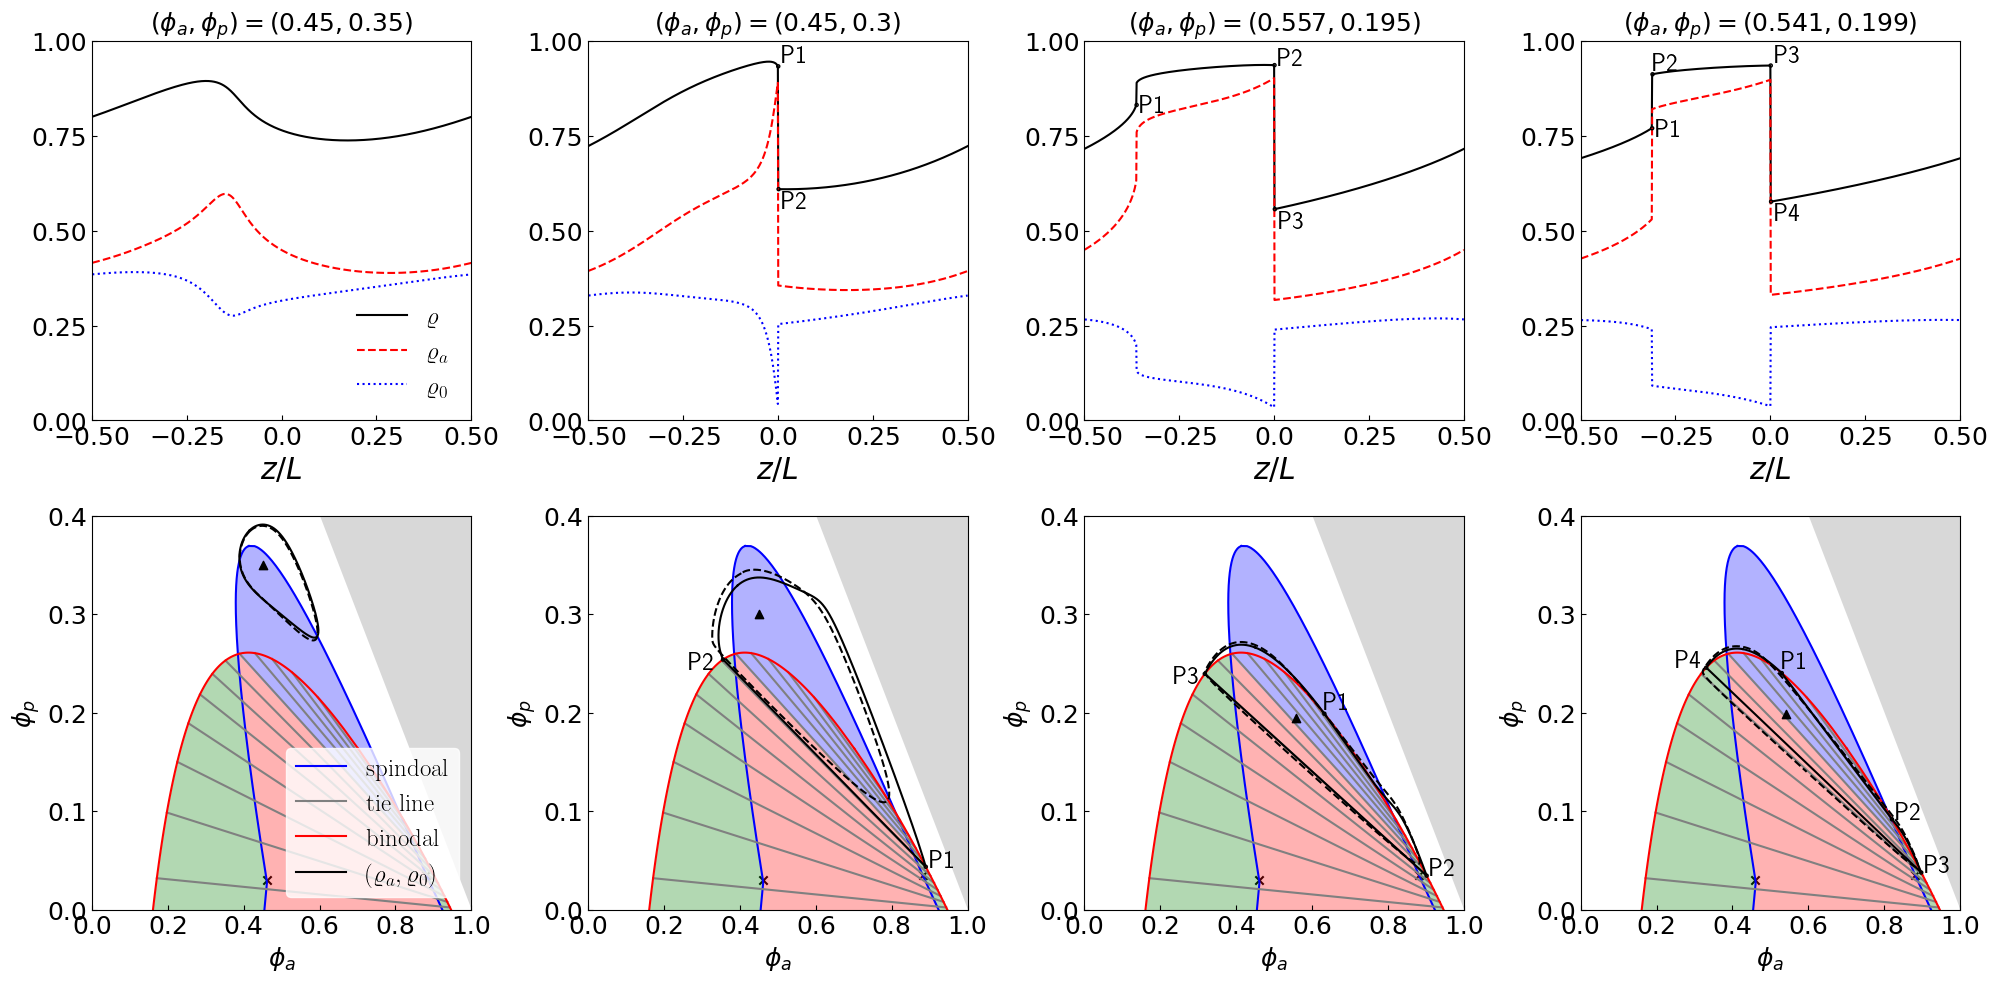

In [4]:
fig = generate_figure_4cases(params_full, params_outer);

# Figure 6


/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/outer_sol/outer_sol_1/[DT,v0,DR,Nx,ϕ,γ]=[1.0, 7.5, 1.0, 1024.0, 0.75, 1.65].jld2
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/full_sol/sol_full/[DT,v0,DR,Lx,Nx,ϕa,ϕp]=[1.0, 7.5, 1.0, 10.0, 1600.0, 0.45, 0.3].jld2
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/full_sol/sol_full/[DT,v0,DR,Lx,Nx,ϕa,ϕp]=[1.0, 7.5, 1.0, 25.0, 1600.0, 0.45, 0.3].jld2
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/full_sol/sol_full/[DT,v0,DR,Lx,Nx,ϕa,ϕp]=[1.0, 7.5, 1.0, 50.0, 1600.0, 0.45, 0.3].jld2
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/full_sol/sol_full/[DT,v0,DR,Lx,Nx,ϕa,ϕp]=[1.0, 7.5, 1.0, 100.0, 1600.0, 0.45, 0.3].jld2


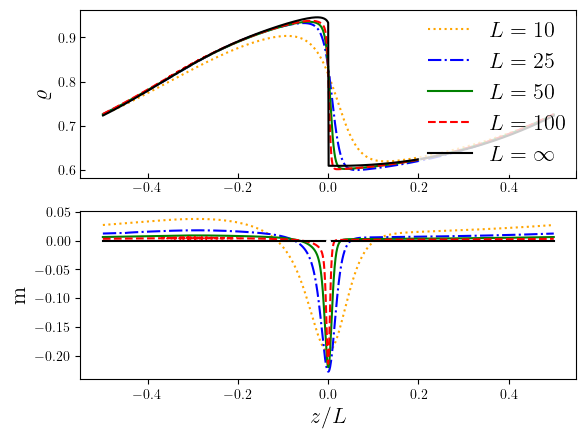

PyObject Text(29.67925624232479, 0.5, '$\\mathrm{m}$')

In [5]:
fig2, axs2 = subplots(2,1); font = 16;
rc("text", usetex=true);
@unpack Lx,Nx,ϕa,ϕp,v0,ϕ,γ = params_outer[2]
fout, u, cout = load_outer1(Lx,Nx,ϕa,ϕp,v0,ϕ,γ)

Nx = 1600;
list_p = zip([10.0,25.0,50.0,100.0],[":","-.","-","--"],["orange","blue","green","red"])
for (Lx,ls,col) in list_p
    param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
    f,u,c = load_full(Lx,Nx,ϕa,ϕp,v0)
    profile_ρm(axs2,font,param,f; lab = "full", col = col, ls = ls)
end
profile_ρm(axs2,font,params_outer[2],fout; lab = "outer")

In [6]:
# # save figure 6
# fig.tight_layout()
# fig_name = "fig6"
# filename = plotsdir("$(fig_name).pdf");
# fig.savefig(filename,dpi = 100, format = "pdf")